In [1]:
# We import the necessary libraries for data visualization and analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow

# We filter out any warning messages that might be raised during the code execution
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
df = pd.read_csv('Dataaftercleaning.csv')

In [3]:
# We import the necessary libraries for preprocessing the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# We create an instance of the StandardScaler to standardize the data
standardScaler = StandardScaler()

# We specify the columns we want to scale
columns_to_scale = ['FL_B', 'FL_A', 'FL_C', 'VS']

# We apply the StandardScaler to the specified columns
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

# We display the first few rows of the dataframe to check if the standardization was successful
df.head()



,Unnamed: 0,Class,FL_B,FL_A,VS,FL_B_3,FL_A_3,FL_B_12,FL_A_12,Container Type,Recyclable fraction,FL_C,FL_C_3,FL_C_12
0,0,0,0.942421,-0.740636,0.360564,75.9,54.7,83.3,39.8,12,0,-1.404335,-21.2,-43.5
1,1,0,1.554666,0.422102,1.178111,83.3,33.9,85.0,57.4,1,1,-1.081010,-49.4,-27.6
2,2,1,-0.989803,1.215183,-0.048210,30.8,55.7,51.7,68.5,1,2,1.803650,24.9,16.8
3,3,0,0.818848,-0.774241,0.360564,91.8,61.1,84.6,43.6,7,0,-1.318452,-30.7,-41.0
4,4,1,0.279623,-0.888499,-0.865758,68.0,30.5,62.4,53.0,7,1,-0.919348,-37.5,-9.4


In [4]:
# We import the necessary library for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# We split the data into training and testing sets using train_test_split
# We specify that we want to use 20% of the data for testing, and the rest for training
train, test = train_test_split(df, test_size=0.2)

# We define the training features we want to use for our model
train_X = train[['FL_A', 'FL_C', 'VS']]

# We define the target variable for our training set
train_y = train.Class

# We define the testing features we want to use for our model
test_X = test[['FL_A', 'FL_C', 'VS']]

# We define the target variable for our testing set
test_y = test.Class


[[402  43]
 [ 43 440]]


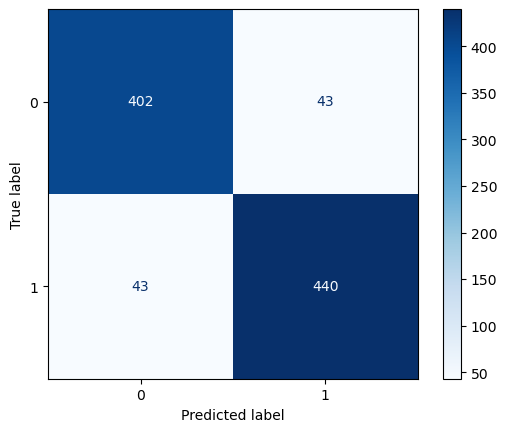

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
#import the necessary metrics for evaluating the classifier's performance.
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
#create a logistic regression classifier object with a fixed random state.
classifier= LogisticRegression(random_state=0)  
#train the classifier on the training data train_X and the corresponding labels train_y.
classifier.fit(train_X,train_y) 
y_pred= classifier.predict(test_X)
#compute the confusion matrix using the predicted labels y_pred and the true labels test_y.
cm= confusion_matrix(test_y,y_pred) 
print(cm)
plot_confusion_matrix(classifier, test_X, test_y, cmap=plt.cm.Blues);

In [7]:


print(classification_report(test_y,y_pred))
#Compute the performance metrics using confusion matrix values
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]
#Calculate the Matthews Correlation Coefficient (MCC)
b = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
b = b**0.5
a = (TP*TN-FP*FN)
MCC_SVM = round(a/b, 3)
#Calculate other performance metrics
Precision_Score = TP / (FP + TP)
Recall_Score = TP / (FN + TP)
Accuracy_Score = (TP + TN)/ (TP + FN + TN + FP)
F1_Score = 2* Precision_Score * Recall_Score/ (Precision_Score + Recall_Score)

print("Accuracy  : ",Accuracy_Score*100)
print("Precision : ",Precision_Score*100)
print("Recall    : ",Recall_Score*100)
print("F1 score  : ",F1_Score*100)
print('MCC score : ', MCC_SVM)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       445
           1       0.91      0.91      0.91       483

    accuracy                           0.91       928
   macro avg       0.91      0.91      0.91       928
weighted avg       0.91      0.91      0.91       928

Accuracy  :  90.73275862068965
Precision :  91.09730848861284
Recall    :  91.09730848861284
F1 score  :  91.09730848861284
MCC score :  0.814


In [8]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, y_pred)
print("MSE:", mse)

MSE: 0.09267241379310345


In [9]:
df.to_csv("After_Logistic_Regression.csv")